## 1. Import libraries and packages

In this assignment, I will use very common and handy libraries and packages like **numpy, Pandas, Scikit-learn, Keras,** and **XGBoost** for prepare data and create the ML models. I will also use **Seaborn** and **Matpolotlib** to visualize summary statistics and results in different steps.

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from missingpy.missforest import MissForest  # pip install missingpy
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from keras import models, layers, regularizers, wrappers
from keras.wrappers.scikit_learn import KerasClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


%matplotlib inline

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. Looking to the train and test sets

As it was said, the dataset split into two sets; train and test set that was provided by Kaggle.

Train set is used to predict model on data and the test set is used to evaluate the predictive model.

In [2]:
# import train set
train = pd.read_csv(r'D:\Western University\A-term\Advanced Machine Learning\Assignment\1\Dataset\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test = pd.read_csv(r'D:\Western University\A-term\Advanced Machine Learning\Assignment\1\Dataset\test.csv').set_index('PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Below is a brief information about each columns of the dataset:

**1. PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

**2. Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

**3. Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

**4. Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

**5. Sex:** Passenger's sex. It's either Male or Female.

**6. Age:** Passenger's age.

**7. SibSp:** Number of siblings or spouses travelling with each passenger.

**8. Parch:** Number of parents of children travelling with each passenger.

**9. Ticket:** Ticket number.

**10. Fare:** How much money the passenger has paid for the travel journey.

**11. Cabin:** Cabin number of the passenger. *"NaN"* values in this column indicates that the cabin number of that particular passenger has not been recorded.

In [5]:
# a quick discription of datasets
train.info()
print('_'*45)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_____________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass 

We can see from the tables that Age feature has some missing for many rows. Missing values in this column indicates that the age of that particular passenger has not been recorded.
Similarly, Cabin values are also missing in many rows.

In [6]:
print(train.isnull().sum())
print('_'*45, '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
_____________________________________________ 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* from train set.

Likewise, There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* from test set.

### Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

In [7]:
print(f"train set shape: {train.shape}")

train set shape: (891, 12)


### Describing training dataset

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types

In [8]:
# train description
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [9]:
# test description
test.describe().round(2)

,Pclass,Age,SibSp,Parch,Fare
count,418.00,332.00,418.00,418.00,417.00
mean,2.27,30.27,0.45,0.39,35.63
std,0.84,14.18,0.90,0.98,55.91
min,1.00,0.17,0.00,0.00,0.00
25%,1.00,21.00,0.00,0.00,7.90
50%,3.00,27.00,0.00,0.00,14.45
75%,3.00,39.00,1.00,0.00,31.50
max,3.00,76.00,8.00,9.00,512.33


Following will show the descriptive statistics of object data types.

In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rogers, Mr. William John",male,347082,G6,S
freq,1,577,7,4,644


In [11]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peacock, Miss. Treasteall",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


This presents that there are duplicate Ticket number and Cabins number. The highest number of duplicate ticket number is "CA. 2343". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4.

We also see that 644 people were embarked from port "S" in training set.

Among 891 rows, 577 were Male and the rest were Female.

### Relationship between Features and target variable (Survival)
We will analyze relationship between different features with respect to Survival on the **train set**. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings.

In total, 38.4% of passengers survived(value of 1) while 61.6% died(value of 0) in train set.

In [12]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Pclass vs. Survival
Higher class passengers have better survival chance.

In [13]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

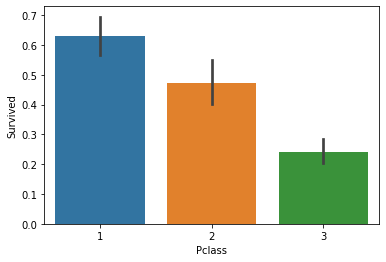

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train)

#### Sex vs. Survival
Females had better survival chance.

In [16]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

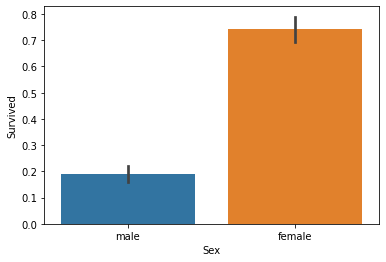

In [18]:
sns.barplot(x='Sex', y='Survived', data=train)

#### Embarked vs. Survival
People who are in C category had better survival chance

In [19]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

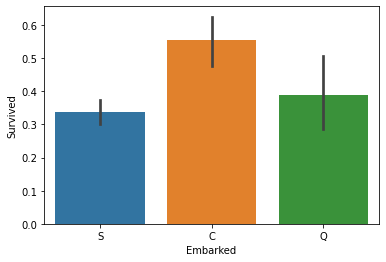

In [21]:
sns.barplot(x='Embarked', y='Survived', data=train)

#### Pclass, Sex & Embarked vs. Survival

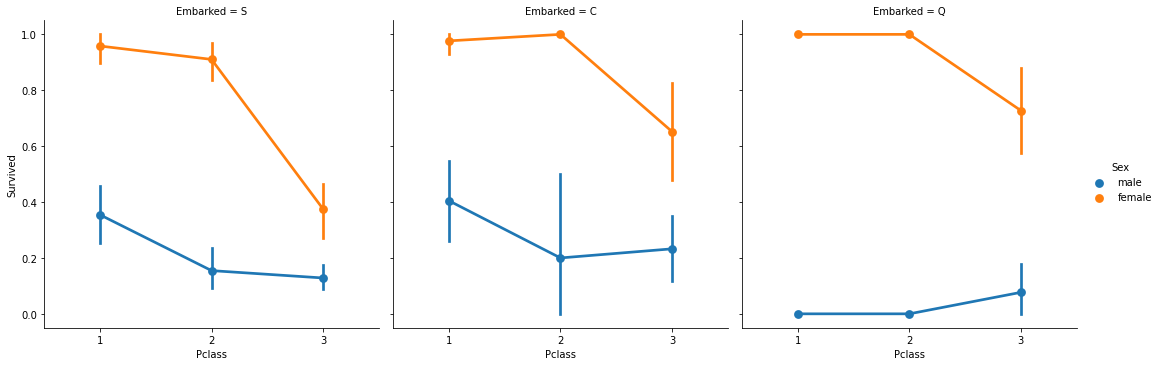

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train, kind='point')

From the above plot, it can be seen that:

- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

#### Parch vs. Survival

In [23]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

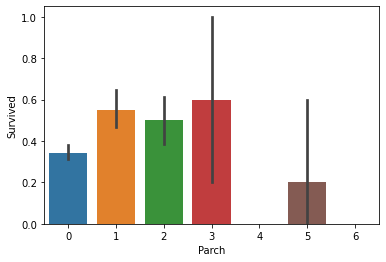

In [25]:
sns.barplot(x='Parch', y='Survived', data=train)

#### SibSp vs. Survival

In [26]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [27]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

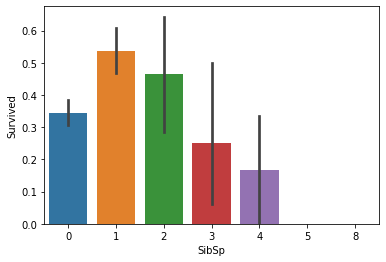

In [28]:
sns.barplot(x='SibSp', y='Survived', data=train)

#### Age vs. Survival

C:\Users\mosta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


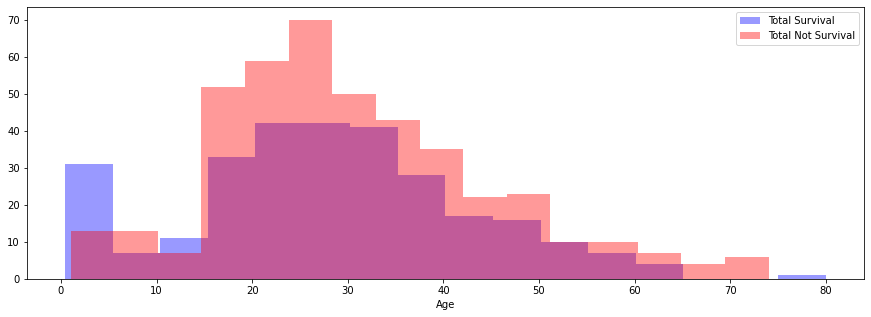

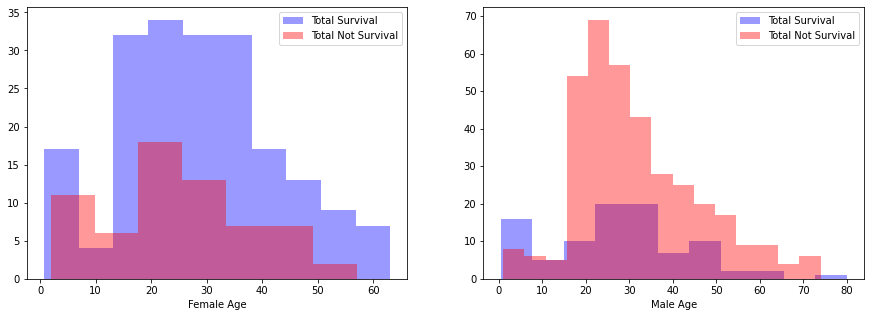

In [29]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Age')
plt.legend(['Total Survival', 'Total Not Survival'])
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Female Age')
plt.legend(['Total Survival', 'Total Not Survival'])

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Male Age')
plt.legend(['Total Survival', 'Total Not Survival'])

As can be seen:

- From Combining male and female data, children with age between <u>0 to 5</u> have more chance for survival.
- <u>*Females*</u> with age between <u>18 to 40</u> and <u>50 and above</u> have higher chance of survival.
- <u>*Males*</u> with age between <u>0 to 14</u> have better chance of survival.

#### Correlations between the features
In this case, we focus on the features that have strong positive or negative correlation with the Survived feature.

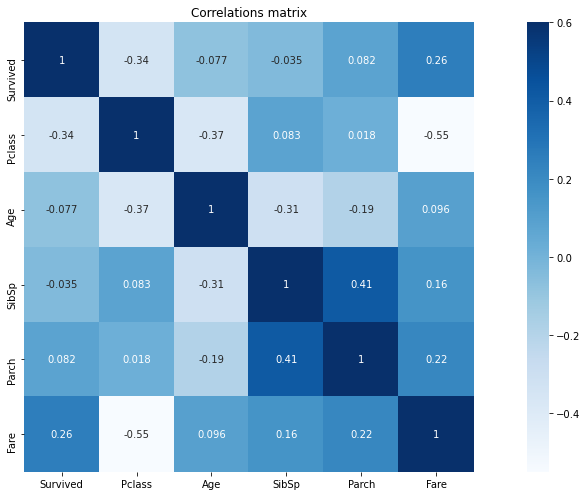

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True, cmap='Blues')
plt.title('Correlations matrix')
plt.tight_layout()

## 3. Prepare data for modelling

### 3.1 Feaure engineering

#### Cabin feature
Cabin feature has some NaN that should be known as "Unknown". This is, some passengers has no cabin. Next, categorical values has been converted to float during imputation proccess.

In [31]:
# NaN values in Cabin is defined as Unknown. It means some passengers had no Cabin
train['Cabin'] = np.where(train['Cabin'].isnull(), "Unknown", train['Cabin'])

In [32]:
train.Cabin.unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

#### Name Feature
I will extract titles from Name column. I will add a new column named **Title** in the Train and test dataset with the Title present in the particular passenger name. I will also replace some less common titles with the name "Other".

In [33]:
# Extract Title from the Name feature
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

So, Title is a new feature which is added to the train and test sets.

In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [35]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

### Imputation missing values

I will use **missForest** (Stekhoven and Buhlmann 2012) as a powerful imputation algorithm for mix-type data. In my case, 3 features are suffering from missing values; Embarked, Cabin, Age.

For more information about missForest imputation algorithm, see [this project](https://github.com/MostafaHosseinian/Missing-Data-Imputation) by myself.

In [36]:
def impute_nan_values(DataFrame):
    
    # Convert object to category
    col = DataFrame.columns
    for i in range(DataFrame.shape[1]):
        if np.dtype(DataFrame[col[i]])=='O':  # select object columns
            DataFrame[col[i]+'_cat'] = DataFrame[col[i]].astype('category').cat.codes
            DataFrame[col[i]+'_cat'] = np.where(DataFrame[col[i]+'_cat']==-1, np.nan, DataFrame[col[i]+'_cat'])
            DataFrame = DataFrame.drop([col[i]], axis=1)  # drop original columns
    
    # drop usless columns for imputation
    DataFrame = DataFrame.drop(['PassengerId', 'Name_cat'], axis=1)
    
    # imputation using missForest
    imputer = MissForest()
    DataFrame_imputed = imputer.fit_transform(DataFrame)
      
    # convert imputed data to DataFrame
    DataFrame_imputed = pd.DataFrame(DataFrame_imputed, columns=DataFrame.columns)
    # polish some imputed features
    DataFrame_imputed['Embarked_cat'] = round(DataFrame_imputed['Embarked_cat'])
    DataFrame_imputed['Cabin_cat'] = round(DataFrame_imputed['Cabin_cat'])
    
    return DataFrame_imputed

In [37]:
train_imp = impute_nan_values(train)

Iteration: 0
Iteration: 1
Iteration: 2


In [38]:
train_imp

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Ticket_cat,Cabin_cat,Embarked_cat,Title_cat
0,0.0,3.0,22.000,1.0,0.0,7.2500,1.0,523.0,147.0,2.0,2.0
1,1.0,1.0,38.000,1.0,0.0,71.2833,0.0,596.0,81.0,0.0,3.0
2,1.0,3.0,26.000,0.0,0.0,7.9250,0.0,669.0,147.0,2.0,1.0
3,1.0,1.0,35.000,1.0,0.0,53.1000,0.0,49.0,55.0,2.0,3.0
4,0.0,3.0,35.000,0.0,0.0,8.0500,1.0,472.0,147.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000,0.0,0.0,13.0000,1.0,101.0,147.0,2.0,4.0
887,1.0,1.0,19.000,0.0,0.0,30.0000,0.0,14.0,30.0,2.0,1.0
888,0.0,3.0,11.294,1.0,2.0,23.4500,0.0,675.0,147.0,2.0,1.0
889,1.0,1.0,26.000,0.0,0.0,30.0000,1.0,8.0,60.0,0.0,2.0


In [39]:
train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        891 non-null    float64
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    float64
 4   Parch         891 non-null    float64
 5   Fare          891 non-null    float64
 6   Sex_cat       891 non-null    float64
 7   Ticket_cat    891 non-null    float64
 8   Cabin_cat     891 non-null    float64
 9   Embarked_cat  891 non-null    float64
 10  Title_cat     891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


#### Embarked feature
Embarked feature had some *NaN* value that was imputed. We saw that category "S" has maximum passengers in previous section.

In [40]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
# imputed Embarked feature
train_imp.Embarked_cat.unique()

array([2., 0., 1.])

In [42]:
# compare value counts before and after imputation
print('before imputation')
print(train.Embarked.value_counts())
print('-'*35)
print('After imputation')
print(train_imp.Embarked_cat.astype('float').value_counts())

before imputation
S    644
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------
After imputation
2.0    644
0.0    168
1.0     79
Name: Embarked_cat, dtype: int64


As we can see from the comparison, 2 missing value belonged to the 'Q' Embarked, while those missing values belonged to 'S' if we considered most frequent strategy!

#### Sex features
This feature has been converted into numerics. 1 is specified for male and 0 for female.

In [43]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [44]:
train_imp.Sex_cat.unique()

array([1., 0.])

In [45]:
# compare value counts before and after imputation
print(train.Sex.value_counts())
print('-'*35)
print(train_imp.Sex_cat.astype('float').value_counts())

male      577
female    314
Name: Sex, dtype: int64
-----------------------------------
1.0    577
0.0    314
Name: Sex_cat, dtype: int64


#### SibSp and Parch Feature
Let's create a new feature named **Family_Size**. This feature is used to check how is the survival chance while travelling alone as compared to travelling with number of families

In [46]:
# Linear combinations of family size
train_imp['Family_Size'] = train_imp['SibSp'] + train_imp['Parch']

In [47]:
train_imp[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean()

,Family_Size,Survived
0,0.0,0.303538
1,1.0,0.552795
2,2.0,0.578431
3,3.0,0.724138
4,4.0,0.200000
5,5.0,0.136364
6,6.0,0.333333
7,7.0,0.000000
8,10.0,0.000000


The result shows that:

- Having FamilySize upto 4 (from 2 to 4) had better survival chance.
- FamilySize = 1, i.e. travelling alone had less survival chance.
- Large FamilySize (size of 5 and above) also had less survival chance.

Hence, I will create a new feature named **Alone**. This feature is used to check whether there is a chance to survive when you are alone or not.

This represents that the passengers who travelled alone had 55.2% survival chance.

In [48]:
for dataset in [train_imp]:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1
    
print (train_imp[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())

   Alone  Survived
0      0  0.346575
1      1  0.552795


#### Age feature
Age has been also imputed in previous steps (imputation). Now, we will map Age according to AgeBand. In fact, 5 categories will be defined to convert Age feature to categorical.

In [49]:
# Define X and y for train set
features = train_imp.drop('Survived', axis = 'columns')
target = train_imp.Survived


features['AgeBand'] = pd.cut(features['Age'], 5)

# Map Age according to AgeBand
for dataset in [features]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

# Drop AgeBound
features = features.drop(['AgeBand'], axis = 'columns')

#### Fare feature
I will create FareBand. The Fare will be divided into 4 categories range. After that, I will map Fare according to FareBand

In [50]:
features['FareBand'] = pd.qcut(features['Fare'], 4)

# Map Fare according to FareBand
for dataset in [features]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [51]:
features = features.drop(['FareBand'], axis = 'columns')

### 3.2 Feature Selection
All data in the train set,which is used in features set, converted to categorical features. From an interpretability standpoint, it is better NOT to standardize categorical features. That way, the meaning of a coefficient is the change in prediction that occurs when a categorical feature changes from a 0 to a 1.

I just consider some interaction between some inportant features.

In [52]:
# some important interactions between features
features['Age_Pclass'] = features['Age']*features['Pclass']
features['Fare_Cabin'] = features['Fare']*features['Cabin_cat']
features['Pcl_Cabin'] = features['Pclass']*features['Cabin_cat']
features['Title_Cabin'] = features['Title_cat']*features['Cabin_cat']
features['Pcl_Embarked'] = features['Pclass']*features['Embarked_cat']

Now, features and target variables are ready to use in the models.

In [53]:
print(f'features shape: {features.shape}')
features.head()

features shape: (891, 17)


,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Ticket_cat,Cabin_cat,Embarked_cat,Title_cat,Family_Size,Alone,Age_Pclass,Fare_Cabin,Pcl_Cabin,Title_Cabin,Pcl_Embarked
0,3.0,1.0,1.0,0.0,0,1.0,523.0,147.0,2.0,2.0,1.0,1,3.0,0.0,441.0,294.0,6.0
1,1.0,2.0,1.0,0.0,3,0.0,596.0,81.0,0.0,3.0,1.0,1,2.0,243.0,81.0,243.0,0.0
2,3.0,1.0,0.0,0.0,1,0.0,669.0,147.0,2.0,1.0,0.0,0,3.0,147.0,441.0,147.0,6.0
3,1.0,2.0,1.0,0.0,3,0.0,49.0,55.0,2.0,3.0,1.0,1,2.0,165.0,55.0,165.0,2.0
4,3.0,2.0,0.0,0.0,1,1.0,472.0,147.0,2.0,2.0,0.0,0,6.0,147.0,441.0,294.0,6.0


## 4. Predictive modelling
### 4.1 Predictive Models and Model Evaluation
Three classification algorithms are rcommended in this assignment. Other algorithms will be used to find the precise predictive model for the train set:

- Naive Bayes (GaussianNB)
- Decision Tree
- Perceptron (Multi-Layer Perceptron)
- Logistic Regression
- Random Forest
- XGBoost



Here's the training procedure:

First, I train these classifiers with the training data.

Then, I calculate the accuracy score of the trained classifier by means of the k-fold cross-validation.

**Please note:** that the accuracy score is generated based on our training dataset. I also use 8-fold for the cross-validation method.

### Naive Bayes (GaussianNB)
[GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [54]:
# Naive Bayesian classifier
NBG = GaussianNB()
NBG_fit = NBG.fit(features, target)

In [55]:
# Cross-Validation
cv_score_NBG = cross_val_score(NBG, features, target, cv=8).mean()
print(f'Cross-Validation Score for GaussianNB: {cv_score_NBG}')

Cross-Validation Score for GaussianNB: 0.7611305501930503


### Decision Tree Classifier
[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) is a type of Supervised Machine Learning where the data is continuously split according to a certain parameter.

I used GridsearchSV method to find the best-tuned parameters for the model.

In [56]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'max_depth': [2, 3, 4],
    'max_leaf_nodes': range(2, 9),
    'min_samples_split' : [2, 3, 4]
})

# Gridsearch model on Decision Tree Classifier
TreeGrid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=8)
TreeGrid.fit(features, target)

# Best parameters
TreeGrid.best_params_

{'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [57]:
# Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=2)
DT.fit(features, target)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [58]:
# Cross-Validation
cv_score_DT = cross_val_score(DT, features, target, cv=8).mean()
print(f'Cross-Validation Score for DecisionTreeClassifier: {cv_score_DT}')

Cross-Validation Score for DecisionTreeClassifier: 0.8160191441441442


### Multi-Layer Perceptron
A [multilayer perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron) is a class of feedforward artificial neural network. A MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer.— MLP Wikipedia

Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
#### by scikit-learn

In [59]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'hidden_layer_sizes': [(50,), (50,50,), (100,), (100,100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'max_iter' : [100, 200, 300]
})

# Gridsearch model on multi-layer perceptron Classifier
MLPGrid = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=8, n_jobs = -1)
MLPGrid.fit(features, target)

# Best parameters
MLPGrid.best_params_

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 300,
 'solver': 'adam'}

In [60]:
# MLP Classifier
mlpc = MLPClassifier(hidden_layer_sizes = MLPGrid.best_params_['hidden_layer_sizes'],
                     activation = MLPGrid.best_params_['activation'],
                     solver = MLPGrid.best_params_['solver'],
                     max_iter = MLPGrid.best_params_['max_iter'])
mlpc.fit(features, target)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=300)

In [61]:
# Cross-Validation
cv_score_mlp = cross_val_score(mlpc, features, target, cv=8).mean()
print(f'Cross-Validation Score for MLPClassifier: {cv_score_mlp}')

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Score for MLPClassifier: 0.8172156531531531


C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


#### by Keras
I decide to define wight regularization for the network. It allows me to apply penalties on layer parameters or layer activity during optimization and prevent overfitting. These penalties are summed into the loss function that the network optimizes.

In [62]:
# Fine-tune model by GridsearchCV method

# define a Network by Keras
def create_network(optimizer):
    # Layer weight regularizers
    kernel_regularizer = regularizers.l1(0.01) # L1 regularization penalty
    kernel_regularizer = regularizers.l2(0.01) # L2 regularization penalty
    kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01) #  both L1 and L2 penalties
    
    Network = models.Sequential()
    Network.add(layers.Dense(units=100, activation='relu', kernel_regularizer = kernel_regularizer, input_shape=(17,)))
    Network.add(layers.Dense(units=100, activation='relu', kernel_regularizer = kernel_regularizer))
    Network.add(layers.Dense(units=1 , activation='sigmoid'))
    Network.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return Network

ANN = KerasClassifier(build_fn = create_network)


# parameters and possible values
param_grid = [{
    'epochs' : [10, 12, 15, 20],
    'optimizer' : ['rmsprop','adam', 'adamax', 'nadam'],
    'batch_size' : [100, 150, 200],
}]

# Gridsearch model on MLP Classifier
MLPKGrid = GridSearchCV(estimator = ANN, param_grid = param_grid, cv=8, n_jobs=-1)
MLPKGrid.fit(features, target)

Epoch 1/20
9/9 [==============================] - 0s 1ms/step - loss: 18.1063 - accuracy: 0.6016
Epoch 2/20
9/9 [==============================] - 0s 776us/step - loss: 13.2763 - accuracy: 0.6240
Epoch 3/20
9/9 [==============================] - 0s 665us/step - loss: 12.1238 - accuracy: 0.6588
Epoch 4/20
9/9 [==============================] - 0s 665us/step - loss: 11.0133 - accuracy: 0.6577
Epoch 5/20
9/9 [==============================] - 0s 501us/step - loss: 10.3975 - accuracy: 0.7262
Epoch 6/20
9/9 [==============================] - 0s 977us/step - loss: 9.7470 - accuracy: 0.7374
Epoch 7/20
9/9 [==============================] - 0s 978us/step - loss: 9.2901 - accuracy: 0.7306
Epoch 8/20
9/9 [==============================] - 0s 985us/step - loss: 8.8397 - accuracy: 0.7520
Epoch 9/20
9/9 [==============================] - 0s 986us/step - loss: 8.4948 - accuracy: 0.7340
Epoch 10/20
9/9 [==============================] - 0s 1ms/step - loss: 8.0108 - accuracy: 0.7879
Epoch 11/20
9/9 [=

GridSearchCV(cv=8,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000277ED367E80>,
             n_jobs=-1,
             param_grid=[{'batch_size': [100, 150, 200],
                          'epochs': [10, 12, 15, 20],
                          'optimizer': ['rmsprop', 'adam', 'adamax', 'nadam']}])

In [63]:
# best parameters
MLPKGrid.best_params_

{'batch_size': 100, 'epochs': 20, 'optimizer': 'adam'}

In [64]:
# Weight regularization to avoid "Overfitting"
kernel_regularizer = regularizers.l1(0.01)
kernel_regularizer = regularizers.l2(0.01)
kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)

# Define a network
Network = models.Sequential()
Network.add(layers.Dense(units=100, activation='relu',  kernel_regularizer = kernel_regularizer, input_shape=(features.shape[1],)))
Network.add(layers.Dense(units=100, activation='relu',  kernel_regularizer = kernel_regularizer))
Network.add(layers.Dense(units=1 , activation='sigmoid'))
Network.compile(optimizer = MLPKGrid.best_params_['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
Network.fit(features, target, batch_size=MLPKGrid.best_params_['batch_size'], epochs=MLPKGrid.best_params_['epochs'])

Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 16.8044 - accuracy: 0.5780
Epoch 2/20
9/9 [==============================] - 0s 824us/step - loss: 13.4337 - accuracy: 0.6655
Epoch 3/20
9/9 [==============================] - 0s 831us/step - loss: 11.6690 - accuracy: 0.6409
Epoch 4/20
9/9 [==============================] - 0s 940us/step - loss: 10.8585 - accuracy: 0.7273
Epoch 5/20
9/9 [==============================] - 0s 875us/step - loss: 10.4566 - accuracy: 0.6723
Epoch 6/20
9/9 [==============================] - 0s 944us/step - loss: 9.8981 - accuracy: 0.7093
Epoch 7/20
9/9 [==============================] - 0s 981us/step - loss: 9.1677 - accuracy: 0.7733
Epoch 8/20
9/9 [==============================] - 0s 1ms/step - loss: 8.6892 - accuracy: 0.7598
Epoch 9/20
9/9 [==============================] - 0s 975us/step - loss: 8.3621 - accuracy: 0.7508
Epoch 10/20
9/9 [==============================] - 0s 980us/step - loss: 7.9621 - accuracy: 0.7621
Epoch 11/20
9/9 [=

As we can see from the summary, this net is constructed by 101 parameters in the first layer, 10100 parameters in the second layer, and 1400 parameters in the third layer. In total, 11,601 parameters are involved in it.

In [65]:
Network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1800      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


Accuracy of the model is as follows:

In [66]:
mlp_k = Network.history.history['accuracy'][MLPKGrid.best_params_['epochs']-1]
print(f'Accuracy score for the model: {mlp_k}')

Accuracy score for the model: 0.7631874084472656


### Logistic Regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression#cite_note-1) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. Logistic regression is estimating the parameters of a logistic model (a form of binary regression).

In this algorithm, max_iter is a parameters which is defined as the maximum number of iterations taken for the solvers to converge. I will set the max_iter parameter to 1000 because if I put the default value for it, it may not be converaged.

In addition, the default penalty for this algorithm is l2. In this case, if I remove the penalty, the result would be the same.

In [67]:
lgreg = LogisticRegression(penalty='none', max_iter=1000)
lgreg.fit(features, target)

LogisticRegression(max_iter=1000, penalty='none')

In [68]:
# Cross-Validation
cv_score_lgreg = cross_val_score(lgreg, features, target, cv=8).mean()
print(f'Cross-Validation Score for Logistic Regression Classifier: {cv_score_lgreg}')

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Score for Logistic Regression Classifier: 0.7867197554697554


C:\Users\mosta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Bootstrap Aggregating or Bagging
Bootstrap aggregating, also called [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating) is a technique of building many decision trees at a time by randomly sampling with replacement, or bootstrapping, from the original dataset. This ensures variety in the trees, which helps to reduce variance and to avoid overfitting.

I will create this algorithm based on the Decision Trees with the same parametes that was created previously.

In [69]:
bag = BaggingClassifier(DT, n_estimators=100)
bag.fit(features, target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        max_leaf_nodes=5),
                  n_estimators=100)

In [70]:
# Cross-Validation
cv_score_bag = cross_val_score(bag, features, target, cv=8).mean()
print(f'Cross-Validation Score for Bagging Classifier: {cv_score_bag}')

Cross-Validation Score for Bagging Classifier: 0.8170949967824968


### Random Forest
The [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble learning method consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [71]:
rfc = RandomForestClassifier()
rfc.fit(features, target)

RandomForestClassifier()

In [72]:
# Cross-Validation
cv_score_rfc = cross_val_score(rfc, features, target, cv=8).mean()
print(f'Cross-Validation Score for Random Forest Classifier: {cv_score_rfc}')

Cross-Validation Score for Random Forest Classifier: 0.8081463159588159


### XGBoost
**Boosting** is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

[***XGBoost*** (Extreme Gradient Boosting)](https://en.wikipedia.org/wiki/XGBoost) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting.

In [73]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'colsample_bytree': [0.6, 0.7, 0.8],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth' : [2, 3, 4],
    'n_estimators' : [50, 100, 150],
    'subsample' : [0.6, 0.8]
})

# Gridsearch model on Decision Tree Classifier
XGBGrid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=8, n_jobs=-1)
XGBGrid.fit(features, target)

# Best parameters
XGBGrid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 150,
 'subsample': 0.8}

In [74]:
xgbc = XGBClassifier(colsample_bytree = XGBGrid.best_params_['colsample_bytree'],
                     learning_rate = XGBGrid.best_params_['learning_rate'],
                     max_depth = XGBGrid.best_params_['max_depth'],
                     n_estimators = XGBGrid.best_params_['n_estimators'],
                     subsample = XGBGrid.best_params_['subsample'])
xgbc.fit(features, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Cross-Validation
cv_score_xgb = cross_val_score(xgbc, features, target, cv=8).mean()
print(f'Cross-Validation Score for XGBClassifier: {cv_score_xgb}')

Cross-Validation Score for XGBClassifier: 0.8418697715572716


The bar chart shows the important features in XGBoost model. As we can see, interaction between some features are playing an important role in the model.

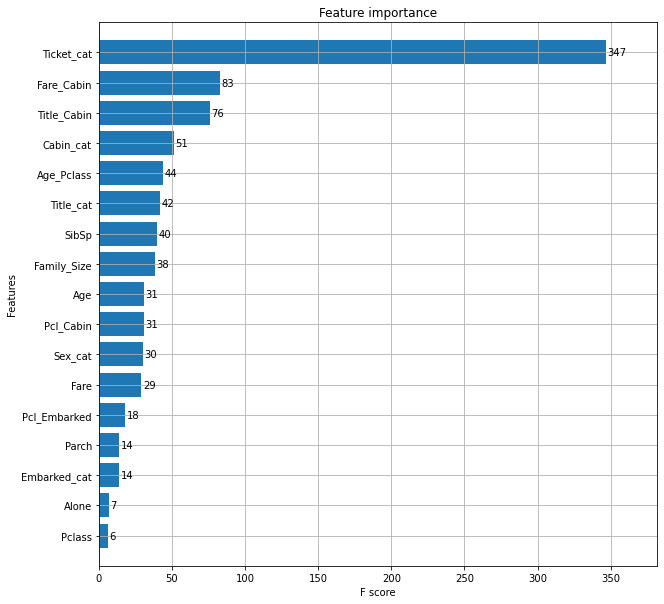

In [76]:
# importance features
fig,ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbc, ax=ax, height=0.8)

### 4.2 Model selection, based on the accuracy
I will compare the accuracy score of all the classifier models used above to determine the best model for the competition

In [77]:
predictive_models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'Perceptron by Scikit-Learn',
              'Perceptron by Keras', 'Logistic Regression', 'Bagging', 'Random Forest', 'XGBoost'],
    
    'Score': [cv_score_NBG, cv_score_DT, cv_score_mlp,
             mlp_k, cv_score_lgreg, cv_score_bag, cv_score_rfc, cv_score_xgb]
    })

predictive_models.sort_values(by='Score', ascending=False).reset_index(drop=True)

,Model,Score
0,XGBoost,0.841870
1,Perceptron by Scikit-Learn,0.817216
2,Bagging,0.817095
3,Decision Tree,0.816019
4,Random Forest,0.808146
5,Logistic Regression,0.786720
6,Perceptron by Keras,0.763187
7,Naive Bayes,0.761131


From the above table, I created 8 models and estimate the general error for each one. As I see, trees-based models are fitted well with the train data. we can see that XGBoost has the highest accuracy score.

So, I choose XGBoost classifier as it has the ability to limit overfitting as well.

In addition, MLP by Keras woud not be good for this dataset because it can work perfectly on the large datasets.

## 5. Get the test set (Preparation)

In this part, I will manipulate the test set and prepare it for the prediction.

In [78]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Title     418 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 39.2+ KB


Like to train set, all features in test set should be cleaned and manipulated.

In [80]:
# NaN values in Cabin is defined as Unknown. It means some passengers had no Cabin
test['Cabin'] = np.where(test['Cabin'].isnull(), "Unknown", test['Cabin'])

# imputation
test['PassengerId'] = test.index
test_imp = impute_nan_values(test)

# Linear combinations of family size
test_imp['Family_Size'] = test_imp['SibSp'] + test_imp['Parch']

# Convert Family_Size to binary like the train set(Alone or not)
for dataset in [test_imp]:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [81]:
# make a copy as test features
test_features = test_imp.copy()

As we know, Age is continus variable which should be Converted into the categorical.

In [82]:
test_features['AgeBand'] = pd.cut(test_features['Age'], 5)

# I map Age according to AgeBand
for dataset in [test_features]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

# Drop AgeBound
test_features = test_features.drop(['AgeBand'], axis = 'columns')

Now, I will create FareBand. The Fare will be divided into 4 categories range.

In [83]:
for dataset in [test_features]:
    dataset['Fare'] = dataset['Fare'].fillna(test_features['Fare'].median())


test_features['FareBand'] = pd.qcut(test_features['Fare'], 4)

# Map Fare according to FareBand
for dataset in [test_features]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# drop FareBand
test_features = test_features.drop(['FareBand'], axis = 'columns')

In [84]:
test_features

,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Ticket_cat,Cabin_cat,Embarked_cat,Title_cat,Family_Size,Alone
0,3.0,2.0,0.0,0.0,0,1.0,152.0,76.0,1.0,2.0,0.0,0
1,3.0,2.0,1.0,0.0,0,0.0,221.0,76.0,2.0,3.0,1.0,1
2,2.0,3.0,0.0,0.0,1,1.0,73.0,76.0,1.0,2.0,0.0,0
3,3.0,1.0,0.0,0.0,1,1.0,147.0,76.0,2.0,2.0,0.0,0
4,3.0,1.0,1.0,1.0,1,0.0,138.0,76.0,2.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,0.0,0.0,1,1.0,267.0,76.0,2.0,2.0,0.0,0
414,1.0,2.0,0.0,0.0,3,0.0,324.0,22.0,0.0,4.0,0.0,0
415,3.0,2.0,0.0,0.0,0,1.0,346.0,76.0,2.0,2.0,0.0,0
416,3.0,1.0,0.0,0.0,1,1.0,220.0,76.0,2.0,2.0,0.0,0


In [85]:
# some important interactions between test features
test_features['Age_Pclass'] = test_features['Age']*test_features['Pclass']
test_features['Fare_Cabin'] = test_features['Fare']*test_features['Cabin_cat']
test_features['Pcl_Cabin'] = test_features['Pclass']*test_features['Cabin_cat']
test_features['Title_Cabin'] = test_features['Title_cat']*test_features['Cabin_cat']
test_features['Pcl_Embarked'] = test_features['Pclass']*test_features['Embarked_cat']

Finally, the cleaned test set is shown as follows:

It should be mentioned that feature_test is ready-to-use set which comes from the cleaned and manipulated test set. The feature_test has also the right shape for the created models. This set will be use to predict survived or died passenger by model(s).

In [86]:
print(f'feature_test shape: {test_features.shape}')
test_features.head()

feature_test shape: (418, 17)


,Pclass,Age,SibSp,Parch,Fare,Sex_cat,Ticket_cat,Cabin_cat,Embarked_cat,Title_cat,Family_Size,Alone,Age_Pclass,Fare_Cabin,Pcl_Cabin,Title_Cabin,Pcl_Embarked
0,3.0,2.0,0.0,0.0,0,1.0,152.0,76.0,1.0,2.0,0.0,0,6.0,0.0,228.0,152.0,3.0
1,3.0,2.0,1.0,0.0,0,0.0,221.0,76.0,2.0,3.0,1.0,1,6.0,0.0,228.0,228.0,6.0
2,2.0,3.0,0.0,0.0,1,1.0,73.0,76.0,1.0,2.0,0.0,0,6.0,76.0,152.0,152.0,2.0
3,3.0,1.0,0.0,0.0,1,1.0,147.0,76.0,2.0,2.0,0.0,0,3.0,76.0,228.0,152.0,6.0
4,3.0,1.0,1.0,1.0,1,0.0,138.0,76.0,2.0,3.0,2.0,0,3.0,76.0,228.0,228.0,6.0


In [87]:
features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_cat', 'Ticket_cat',
       'Cabin_cat', 'Embarked_cat', 'Title_cat', 'Family_Size', 'Alone',
       'Age_Pclass', 'Fare_Cabin', 'Pcl_Cabin', 'Title_Cabin', 'Pcl_Embarked'],
      dtype='object')

In [88]:
test_features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_cat', 'Ticket_cat',
       'Cabin_cat', 'Embarked_cat', 'Title_cat', 'Family_Size', 'Alone',
       'Age_Pclass', 'Fare_Cabin', 'Pcl_Cabin', 'Title_Cabin', 'Pcl_Embarked'],
      dtype='object')

## 6. Create Submission File to Kaggle Competition
I will create the submisssion file by using the XGBoost model from the cleaned test set.

Finally, the best record is submitted to the submission part through Kaggle Titanic Competition.

Thank you!